In [26]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.font_manager
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
sns.set(style="whitegrid")

# Read data and explore data

In [27]:
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [28]:
data["date_added"] = pd.to_datetime(data["date_added"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [29]:
data.shape

(7787, 12)

In [30]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# Cleaning data

Remove unnecessary data for this analysis such as `show id`, `director`, `cast`

In [31]:
data = data.drop(labels=["show_id","director","cast"], axis=1)
data.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...



Replace the missing values ​​in countries with `United States` because United States is the most repeating value. And remove the rows for `rating` and `date_added` as there were only `7` and `10` missing records respectively.

In [32]:
data["country"]=data["country"].fillna("United States")
data = data.dropna(subset=["rating","date_added"])
data.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [33]:
data["listed_in"] = data["listed_in"].apply(lambda x: x.split(",")[0])
data["country"] = data["country"].apply(lambda x: x.split(",")[0])
data.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow..."
3,Movie,9,United States,2017-11-16,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#  Data analysis

In [34]:
total_catalog = data[["type"]]
total_catalog  = total_catalog .value_counts().reset_index(name="count")
total_catalog 

,type,count
0,Movie,5372
1,TV Show,2398


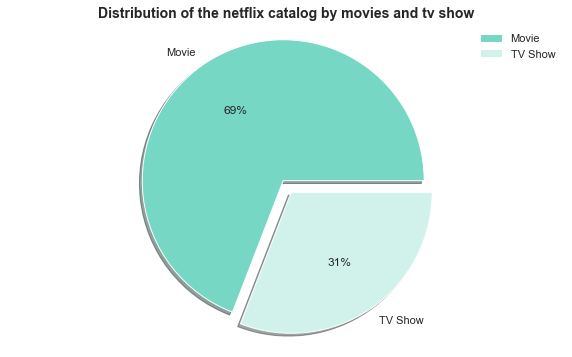

In [35]:
color_palette_list = ["#76D7C4", "#D1F2EB"]

fig, ax = plt.subplots(figsize = (10,6))
labels = total_catalog.type.unique()
ax.pie(total_catalog["count"],explode=(0.1,0),labels=labels,colors=color_palette_list[0:2], autopct="%1.0f%%", 
       shadow=True, startangle=0)
ax.axis("equal")
ax.set_title("Distribution of the netflix catalog by movies and tv show", fontweight="bold",size=14)
ax.legend(frameon=False)
plt.show()

69% of netflix's total productions correspond to `movies` while the remaining 31% represent `tv show`.

In [36]:
total_productions_per_year = data[['release_year']]
total_productions_per_year = total_productions_per_year[total_productions_per_year['release_year'] >= 2010].value_counts().reset_index(name='counts')

In [37]:
def show_values_on_bars(axs,):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            height = p.get_height()
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            ax.text(_x, _y, int(height), ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [38]:
movies_peer_year = data[data['type'] == 'Movie']
movies_peer_year = movies_peer_year[['release_year']]
movies_peer_year = movies_peer_year[movies_peer_year['release_year'] >= 2010].value_counts().reset_index(name='counts')

<function matplotlib.pyplot.show(close=None, block=None)>

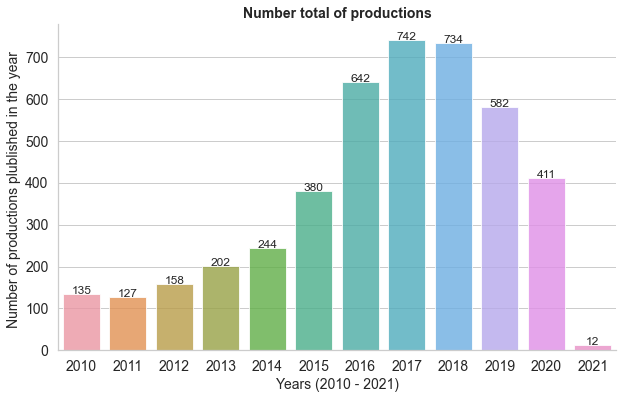

In [39]:
ax = plt.figure(figsize=(10,6))
ax = sns.barplot(data=movies_peer_year,x='release_year',y = 'counts',alpha=0.8)
sns.despine()
show_values_on_bars(ax)
plt.title("Number total of productions",fontweight='bold',size=14)
plt.ylabel("Number of productions plublished in the year ",size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Years (2010 - 2021)",size=14)
plt.show

In [40]:
tv_shows_peer_year = data[data['type'] == 'TV Show']
tv_shows_peer_year = tv_shows_peer_year[['release_year']]
tv_shows_peer_year = tv_shows_peer_year[tv_shows_peer_year['release_year'] >= 2010].value_counts().reset_index(name='counts')

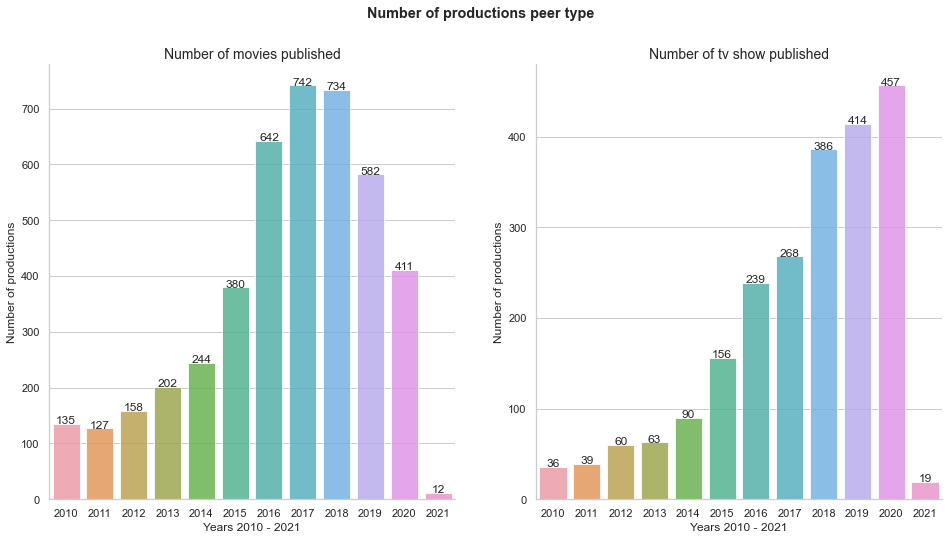

In [41]:
fig, axes = plt.subplots(1,2 , figsize=(16, 8))
fig.suptitle('Number of productions peer type',fontweight='bold')
axes[0].set_title("Number of movies published",fontsize=14)
axes[1].set_title("Number of tv show published",fontsize=14)
sns.barplot(ax=axes[0] ,x='release_year',y = 'counts',data=movies_peer_year,alpha=0.8)
sns.barplot(ax=axes[1] ,x='release_year',y = 'counts',data=tv_shows_peer_year,alpha=0.8)
sns.despine()
plt.setp(axes[:], ylabel='Number of productions')
plt.setp(axes[:], xlabel='Years 2010 - 2021')
show_values_on_bars(axes[:])
plt.show()


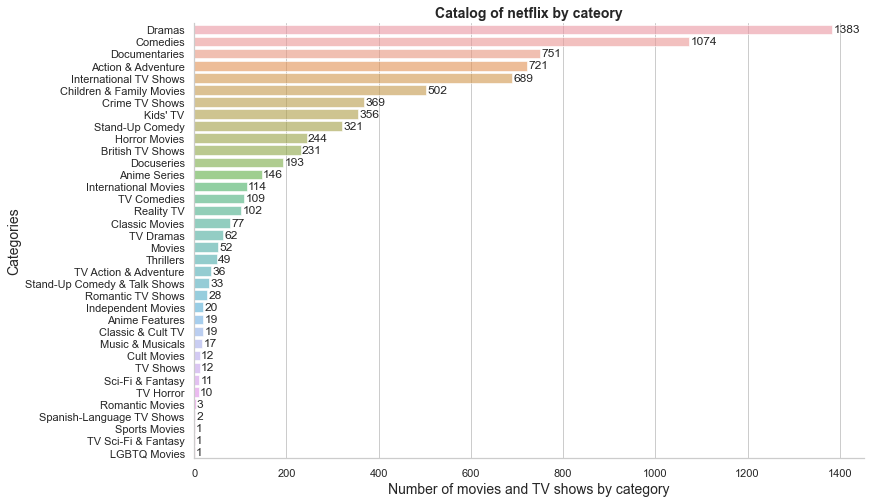

In [42]:
category = data[["listed_in"]].value_counts().reset_index(name="count")
plt.figure(figsize=(12, 8))
plt.title("Catalog of netflix by cateory",size=14, fontweight='bold')
ax = sns.barplot(data=category,x = "count", y = "listed_in", alpha=0.6)
for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = width+3, y = p.get_y()+(height/2), s = int(width), va = 'center')
sns.despine()
plt.xlabel("Number of movies and TV shows by category",size=14)
plt.ylabel("Categories", size=14)
plt.show()

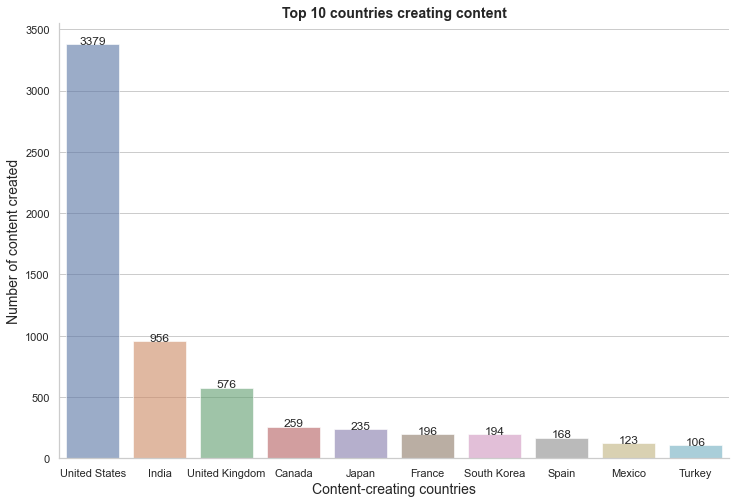

In [43]:
content_by_countries = data[["country"]].value_counts().reset_index(name="count")[:10]
plt.figure(figsize=(12, 8))
plt.title("Top 10 countries creating content",size=14, fontweight='bold')
ax = sns.barplot(data=content_by_countries,x = "country", y = "count", alpha=0.6)
show_values_on_bars(ax)
sns.despine()
plt.xlabel("Content-creating countries",size=14)
plt.ylabel("Number of content created", size=14)
plt.show()

In [44]:
text = " ".join(review for review in data.description)

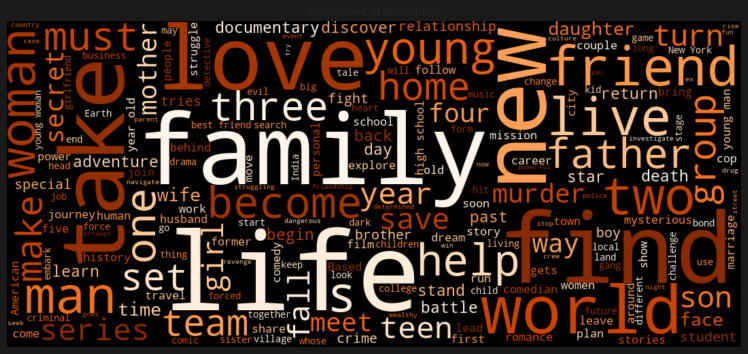

In [45]:
plt.figure(figsize=(20,6), facecolor='k')
wordcloud = WordCloud(width=1080, height=480, colormap="Oranges_r").generate(text)
plt.title("WordCloud of description")
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()